In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
adult = pd.read_csv("https://raw.githubusercontent.com/uvm-plaid/programming-dp/master/notebooks/adult_with_pii.csv");

In [8]:
adult.head()

,Name,DOB,SSN,Zip,Workclass,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Hours per week,Country,Target,Age,Capital Gain,Capital Loss
0,Karrie Trusslove,9/7/1967,732-14-6110,64152,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,56,2174,0
1,Brandise Tripony,6/7/1988,150-19-2766,61523,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35,0,0
2,Brenn McNeely,8/6/1991,725-59-9860,95668,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,32,0,0
3,Dorry Poter,4/6/2009,659-57-4974,25503,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,14,0,0
4,Dick Honnan,9/16/1951,220-93-3811,75387,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,72,0,0


In [5]:
adult_data = adult.copy().drop(columns=['Name','SSN']) # copy method returns a copy of specified list,drop removes specified row or column
adult_pii = adult[['Name','SSN','DOB','Zip']]
adult_data.head(1)

,DOB,Zip,Workclass,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Hours per week,Country,Target,Age,Capital Gain,Capital Loss
0,9/7/1967,64152,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,56,2174,0


In [8]:
karries_row = adult_pii[adult_pii['Name'] == 'Karrie Trusslove']
pd.merge(karries_row, adult_data, left_on=['DOB','Zip'],right_on=['DOB','Zip'])

,Name,SSN,DOB,Zip,Workclass,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Hours per week,Country,Target,Age,Capital Gain,Capital Loss
0,Karrie Trusslove,732-14-6110,9/7/1967,64152,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,56,2174,0


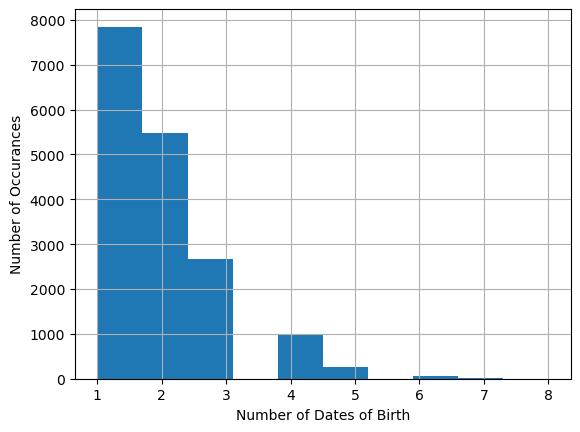

In [9]:
adult_pii['DOB'].value_counts().hist()
plt.xlabel('Number of Dates of Birth')
plt.ylabel('Number of Occurances');

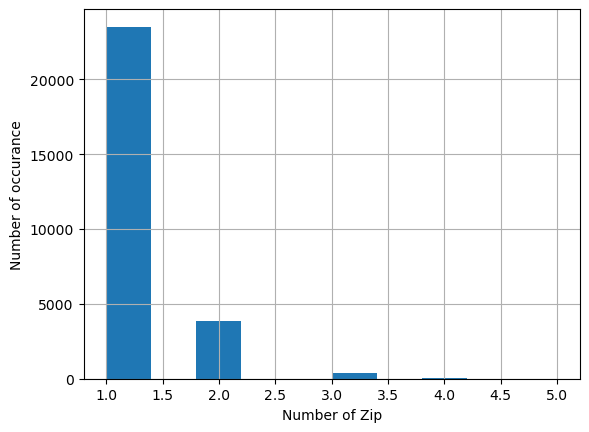

In [11]:
adult_pii['Zip'].value_counts().hist()
plt.xlabel('Number of Zip')
plt.ylabel('Number of occurance');

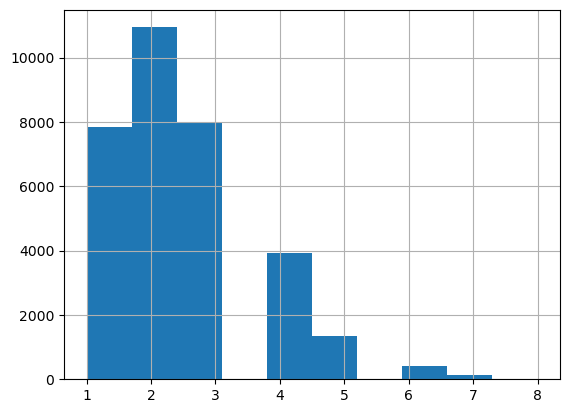

In [14]:
attack = pd.merge(adult_pii, adult_data,left_on=['DOB'],right_on=['DOB'])
attack['Name'].value_counts().hist();

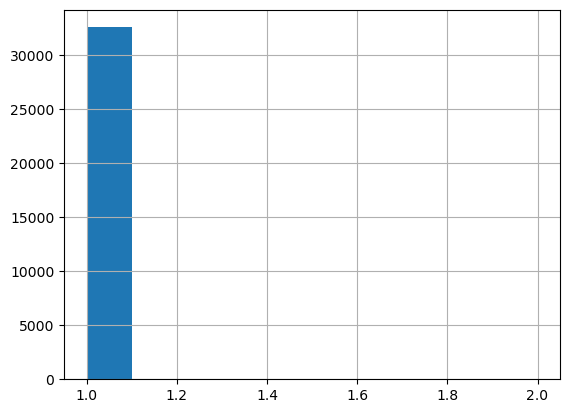

In [15]:
attack = pd.merge(adult_pii, adult_data,left_on=['DOB','Zip'],right_on=['DOB','Zip'])
attack['Name'].value_counts().hist();

In [16]:
attack['Name'].value_counts().head()

Antonin Chittem     2
Barnabe Haime       2
Karrie Trusslove    1
Nerty Matashkin     1
Dore Emmitt         1
Name: Name, dtype: int64

In [17]:
adult['Age'].mean()

41.77250253355035

In [22]:
adult[['Education','Age']].groupby('Education',as_index=False).mean().head(3)

,Education,Age
0,10th,42.032154
1,11th,42.057021
2,12th,41.879908


In [23]:
adult[['Zip','Age']].groupby('Zip', as_index=False).mean().head()

,Zip,Age
0,4,72.0
1,12,46.0
2,16,38.0
3,17,31.0
4,18,40.0


In [24]:
adult['Age'].sum()

1360238

In [25]:
adult[adult['Name']!='karrie Trusslove']['Age'].sum()

1360238

In [26]:
adult['Age'].sum()-adult[adult['Name']!='Karrie Trusslove']['Age'].sum()

56